In [13]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [11]:
def mix(*color_value_list, alpha=True):
    if alpha:
        colorvec = lambda c: np.array(mpl.colors.to_rgba(c))
    else:
        colorvec = lambda c: np.array(mpl.colors.to_rgba(c))[:3]
        # colorvec = lambda c: np.array(mpl.colors.to_rgb(c))
    assert len(color_value_list) > 0
    c1 = colorvec(color_value_list[0])
    if len(color_value_list) == 1:
        return c1
    v = color_value_list[1]/100
    assert isinstance(v, float)
    if len(color_value_list) > 2:
        c2 = colorvec(color_value_list[2])
    else:
        c2 = 1
    c3 = v*c1 + (1-v)*c2
    return mix(c3, *color_value_list[3:])

In [2]:
X,Y,Z =[],[],[]

for x in range(1,21):
    for y in range(1,21):
        X.append(x)
        Y.append(y)
        Z.append(x/y)

In [30]:
start = mix(plt.cm.get_cmap('RdYlBu')(0.0), 80, 'red')
stop = mix(plt.cm.get_cmap('RdYlBu')(1.0), 85, 'xkcd:baby blue')

def homotopy(x, y, num):
    x = np.asarray(x)
    y = np.asarray(y)
    assert x.shape in ((3,), (4,))
    assert y.shape in ((3,), (4,))
    x = x[None]
    y = y[None]
    s = np.linspace(0,1,num)[:,None]
    return (1-s)*x + s*y

RedBlueMap = mpl.colors.LinearSegmentedColormap.from_list('RedBlue', homotopy(start, stop, 100))

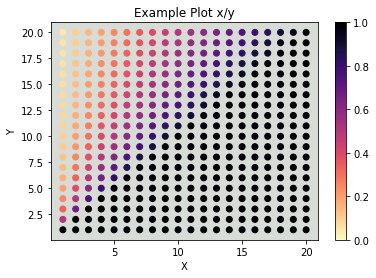

In [38]:
# cm = plt.cm.get_cmap('RdYlBu')
cm = plt.cm.get_cmap('magma_r')
# cm = RedBlueMap
sc = plt.scatter(X, Y, c=Z, vmin=0, vmax=1, cmap=cm)
plt.colorbar(sc)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Example Plot x/y')
plt.gca().set_facecolor('xkcd:light grey')
# plt.gca().set_facecolor(mix('xkcd:light grey', 50, 'xkcd:grey'))